In [23]:

import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

n = 50
m = 5
sigma = 1.5
alpha = 0.05

#### Генерируем выборку #

In [24]:
x_n = np.array([sps.uniform(loc = -1, scale = 2).rvs(size = m) for i in range (n)])

print(x_n)

[[-0.08828782 -0.71614252 -0.80581577  0.72045398  0.10137327]
 [ 0.51971044 -0.18930035 -0.26480552 -0.16103448  0.25055968]
 [-0.06956291 -0.71465503  0.7536287  -0.03634553  0.67618317]
 [-0.44891758 -0.42988923 -0.89975664  0.71162987  0.14619249]
 [-0.67448058 -0.19702505  0.07499105  0.85230732  0.23386151]
 [-0.49080623 -0.25861507  0.46538881 -0.29414957 -0.18466068]
 [-0.55997901  0.88912459 -0.2061202   0.86259879  0.5278336 ]
 [ 0.77227464 -0.65955048  0.88383496  0.45033478  0.76060412]
 [ 0.97225319 -0.63760894 -0.42888959  0.37880209  0.33357838]
 [-0.63381997 -0.60932595 -0.28886857  0.02049676 -0.72626929]
 [-0.58152664 -0.65789635  0.14256019 -0.05712007  0.03997702]
 [ 0.26484423 -0.47588053 -0.92411299  0.09704378 -0.83450513]
 [ 0.39280475 -0.10181846 -0.64289796 -0.22805382 -0.65970932]
 [-0.19166728 -0.06205857  0.21786989  0.2423141  -0.42483643]
 [-0.77687672 -0.80824529 -0.91713522 -0.18845424 -0.04711867]
 [ 0.9043596  -0.13436733 -0.22351676 -0.46416695 -0.59

In [25]:
y_n = np.array([])
for i in range(n):
    M = 2 + 3 * x_n[i][0] - 2 * x_n[i][1] + x_n[i][2] + x_n[i][3] - x_n[i][4]
    y_i = sps.norm(loc = M, scale = sigma).rvs(size = 1)
    y_n = np.append(y_n, y_i)

print(y_n)

[ 3.69110774  1.94354872  4.22962218  4.37822213  1.1100232   0.56152901
 -0.4233116   6.64873728  5.36156737 -0.48894177  0.47662066  4.15687742
  4.5506774   2.22865775  1.06921927  5.95544901  2.68445266  0.41783713
  0.4488504   0.78586677  3.84747377  0.30768948 -0.35915983 -0.62795799
  7.08254405  0.03622781  2.75447736  3.04702458  1.68473531  0.67810032
  4.51852159 -2.31092121  1.67874871 -0.74063878 -3.54776629  2.71801148
  2.50075857 -1.94587669  0.59986358  1.62481579  1.87876919  6.11147693
  0.48401761  4.52821946  4.04972869  3.7196998   4.13942827 -1.57879538
  5.84058405  4.31844628]


## а) Проверить переменные ksi_k на мультиколлинеарность

#### Для ksi_i получаем матрицу факторов Psi с базисом {1, .., ksi_i-1, ksi_i+1, ..} и вероятностную модель по выборке Y #

In [26]:
for i in range(m):
    Psi_tran_ksi = x_n.copy().T
    Y_ksi = np.atleast_2d(Psi_tran_ksi[i].copy()).T
    Psi_tran_ksi[i] = 1
    
    F_ksi = np.dot(Psi_tran_ksi, Psi_tran_ksi.T)
    F_rever_ksi = np.linalg.inv(F_ksi)

    b_sample = np.dot(np.dot(F_rever_ksi, Psi_tran_ksi), Y_ksi)
    RSS_ksi = np.dot( (Y_ksi - np.dot(Psi_tran_ksi.T, b_sample)).T, (Y_ksi - np.dot(Psi_tran_ksi.T, b_sample)))

    y_mean_ksi = np.mean(Y_ksi)
    TSS_ksi = np.sum((Y_ksi - y_mean_ksi)**2)

    R_2_ksi = (TSS_ksi - RSS_ksi) / TSS_ksi
    
    print(i+1, R_2_ksi, R_2_ksi[0, 0] > 0.7)

1 [[0.03251273]] False
2 [[0.04133106]] False
3 [[0.0335783]] False
4 [[0.02928515]] False
5 [[0.06007499]] False


#### Получается, связи между переменными ksi_k нет #

## b) Определить уравнение линейной регрессии и проверить значимость коэффициентов

#### Уравнение линейной регрессии с базисом {1, x_1, x_2, x_3, x_4, x_5}

In [27]:
Psi_tran = x_n.copy().T
Y = np.atleast_2d(y_n).T
Psi_tran = np.concatenate([[np.ones(n)], Psi_tran])

F = np.dot(Psi_tran, Psi_tran.T)
F_rever = np.linalg.inv(F)

betta_sample = np.dot(np.dot(F_rever, Psi_tran), Y)
print(betta_sample)
print("Уравнение линейной регрессии: ")
print("y = ",  np.round(betta_sample[0, 0], 3), "+ ", np.round(betta_sample[1, 0], 3), "* x_1 + ",  np.round(betta_sample[2, 0], 3), "* x_2 + ", np.round(betta_sample[3, 0], 3), "* x_3 + ", np.round(betta_sample[4, 0], 3), "* x_4 + ", np.round(betta_sample[5, 0], 3), "* x_5")

[[ 2.10805563]
 [ 3.16381158]
 [-1.9016281 ]
 [ 0.6972324 ]
 [ 1.1044166 ]
 [-1.12754623]]
Уравнение линейной регрессии: 
y =  2.108 +  3.164 * x_1 +  -1.902 * x_2 +  0.697 * x_3 +  1.104 * x_4 +  -1.128 * x_5


In [28]:
#Найдём вектор ошибок по выборке

e = Y - np.dot(Psi_tran.T, betta_sample)
print(e)

indice_min_e = np.argmin(e)
indice_max_e = np.argmax(e)

[[ 0.38100396]
 [-1.52375392]
 [ 1.25975644]
 [ 2.87921012]
 [ 0.03132978]
 [-0.69333184]
 [ 0.71728718]
 [ 0.5871512 ]
 [-0.77820379]
 [-2.39055244]
 [-1.03390573]
 [-0.09784161]
 [ 0.96250365]
 [-0.28955544]
 [ 0.67653314]
 [ 0.73214521]
 [ 0.89346449]
 [-0.05130597]
 [ 0.79718922]
 [ 1.27728187]
 [ 0.39649585]
 [-0.26895037]
 [-1.3133142 ]
 [ 0.44775286]
 [ 0.82631338]
 [ 2.1463093 ]
 [-0.95220856]
 [ 0.90156845]
 [-0.25265965]
 [-1.52864201]
 [-0.30955403]
 [-1.68889362]
 [-0.53211375]
 [-0.82490884]
 [-1.89977651]
 [-0.43198716]
 [ 0.40755639]
 [ 0.50484787]
 [-1.92775881]
 [-0.94605654]
 [ 0.14844451]
 [ 2.01029077]
 [ 0.78833158]
 [ 1.08022614]
 [ 1.35652747]
 [-0.50233586]
 [ 0.44910111]
 [-1.73713732]
 [ 0.612249  ]
 [-1.29612297]]


In [29]:
#Остаточная сумма квадратов

RSS = np.dot( e.T, e )
print("RSS = ", RSS[0, 0])

RSS =  63.67797775848717


#### Проверим значимость коэффициентов i=0,..,m #
H0: betta_i = 0  \
H1: betta_i != 0 

delta = betta_sample_i / sqrt( RSS * F-1_ii) ~ t(n-p) 

p-value = 2 * P( delta >= |delta_sample| ) = 2 * (1 - F(|delta_sample|))

In [30]:
betta_unimportant_index, betta_unimportant_pvalue = -1, -1 # самый незначительный коэф
p = m + 1

for i in range( p ):
    
    delta_sample_i = betta_sample[i] / np.sqrt(RSS * F_rever[i, i]) * np.sqrt(n - p)
    p_value_i = 2 * (1 - sps.t.cdf(np.abs(delta_sample_i), n - p))
    
    if p_value_i > betta_unimportant_pvalue:
        betta_unimportant_pvalue = p_value_i
        betta_unimportant_index = i
    
    print("Для ", i + 1," коэффициента")
    print("delta_sample = ", delta_sample_i[0, 0])
    print("p-value = ", p_value_i[0, 0])
    if p_value_i > alpha:
        print("Нет оснований отвергнуть H0 => Считаем, что betta", i, " не значителен")
    else:
        print("Отвергаем H0 => Считаем, что betta", i, " значителен")
    print("")
    
print("Caмый незначительный коэф: ", betta_unimportant_index+1, "c p-value = ", betta_unimportant_pvalue[0, 0])

Для  1  коэффициента
delta_sample =  11.05073184848111
p-value =  2.7977620220553945e-14
Отвергаем H0 => Считаем, что betta 0  значителен

Для  2  коэффициента
delta_sample =  9.637171884995976
p-value =  2.062572335148616e-12
Отвергаем H0 => Считаем, что betta 1  значителен

Для  3  коэффициента
delta_sample =  -6.065164132390711
p-value =  2.706735329205401e-07
Отвергаем H0 => Считаем, что betta 2  значителен

Для  4  коэффициента
delta_sample =  2.45631138866825
p-value =  0.018053874990510144
Отвергаем H0 => Считаем, что betta 3  значителен

Для  5  коэффициента
delta_sample =  3.687327267432325
p-value =  0.0006193033312569263
Отвергаем H0 => Считаем, что betta 4  значителен

Для  6  коэффициента
delta_sample =  -3.4811888160208575
p-value =  0.0011395958940827455
Отвергаем H0 => Считаем, что betta 5  значителен

Caмый незначительный коэф:  4 c p-value =  0.018053874990510144


#### Получается, все коэффициенты регрессии значимы #

## с) Определить коэффициент детерминанции и проверить его значимость

In [31]:
y_mean = np.mean(Y)
print("y_mean = ", y_mean)

#полная сумма квадратов
TSS = np.sum((Y - y_mean)**2)
print("TSS = ", TSS)

#Коэффициент детерминации
R_2 = (TSS - RSS) / TSS
print("R_2 = ", R_2[0,0])

y_mean =  2.1364971846877023
TSS =  301.2771371034379
R_2 =  0.7886398603933078


#### Получается, регрессия объясняет разброс на более 50% #

H0: регрессия не значима  \
H1: регрессия значима

delta = R^/(1 - R^2) * (n - p)/(p - 1) ~ F(p - 1, n - p)        
где p = m+1

p-value = P( delta >= delta_sample ) = 1 - F(delta_sample)

In [32]:
delta_sample = R_2 / (1 - R_2) * (n - p) / (p - 1)
print("delta_sample = ", delta_sample[0, 0])

p_value = 1 - sps.f.cdf(delta_sample, (p - 1), (n - p))
print("p_value = ", p_value[0, 0])

if p_value > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что регрессия не значительна")
else:
    print("Отвергаем H0 => Регрессия значима")

delta_sample =  32.83509740472072
p_value =  8.493206138382448e-14
Отвергаем H0 => Регрессия значима


#### Получается, что регрессия значима #

## d) Найти значение в точке x_k = 0 и постороить 95% доверительный интервал

Найдём доверительный интервал из: 

( y0 - eta_0 ) / (kappa * sqrt(RSS)) * sqrt(n - p) ~ t(n - p)

P( -t_gamma <  ( y0_sample - eta_0 )*sqrt((n - p) / RSS)/kappa  < t_gamma ) \
P( y0_sample - t_gamma * kappa * sqrt(RSS / (n - p)) < eta_0 < y0_sample + t_gamma * kappa * sqrt(RSS / (n - p)))


In [33]:
y0 = betta_sample[0, 0] + betta_sample[1, 0] * 0 + betta_sample[2, 0] * 0 + betta_sample[3, 0] * 0 + betta_sample[4, 0] * 0 + betta_sample[5, 0] * 0
print("y0 = ", y0)

Psi_x0 = np.atleast_2d([1, 0, 0, 0, 0, 0])
print("Psi_x0 = ", Psi_x0)
kappa = np.sqrt(1 + np.dot(np.dot(Psi_x0, F_rever), Psi_x0.T))

t2 = sps.t.ppf(0.975, n - p) 

eta_1 = y0 - t2 * kappa * np.sqrt(RSS) / np.sqrt(n - p)
eta_2 = y0 + t2 * kappa * np.sqrt(RSS) / np.sqrt(n - p)

print("")
print(np.round(eta_1[0, 0], 3), " < eta_0 < ", np.round(eta_2[0, 0], 3))

y0 =  2.108055634749822
Psi_x0 =  [[1 0 0 0 0 0]]

-0.347  < eta_0 <  4.563


## e) Проверить предположение о независимости ошибок измерения

In [34]:
#Подсчёт количества инверсий

def merge(arr, buffer, left, mid, right): 
    i = left      
    j = mid + 1 
    k = left      
    inv_count = 0
    while i <= mid and j <= right: 
        if arr[i] <= arr[j]: 
            buffer[k] = arr[i] 
            k += 1
            i += 1
        else: 
            buffer[k] = arr[j] 
            inv_count += (mid-i + 1) 
            k += 1
            j += 1
    while i <= mid: 
        buffer[k] = arr[i] 
        k += 1
        i += 1
    while j <= right: 
        buffer[k] = arr[j] 
        k += 1
        j += 1
    for q in range(left, right + 1): 
        arr[q] = buffer[q] 
    return inv_count
  
def mergecount(arr, buffer, left, right): 
    inv_count = 0 
    if left < right: 
        mid = (left + right)//2
        inv_count += mergecount(arr, buffer, left, mid) 
        inv_count += mergecount(arr, buffer, mid + 1, right) 
        inv_count += merge(arr, buffer, left, mid, right)
    return inv_count  

def inversion_count(arr, n): 
    buffer = [0]*n 
    return mergecount(arr, buffer, 0, n - 1) 

#### Проверяем по критерию инверсии #

H0: полученные данные - независимые \
H1: полученные данные - зависимы

delta = ( I - (n*(n-1)/4) ) / np.sqrt( n**3 / 36 ) ~> N(0, 1)

n = 50 >> 1

p-value = 2*(1 - F(|delta_sample|))

In [35]:

I = inversion_count(list(e), n)
print("I = ", I)

delta_sample = ( I - (n*(n-1)/4) ) / np.sqrt( n**3 / 36 )
print("delta_sample = ", delta_sample)

p_value = 2 * (1 - sps.norm.cdf(np.abs(delta_sample), 0, 1))
print("p_value = ", p_value)

if p_value > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что ошибки e_i независимы")
else:
    print("Отвергаем H0 => Считаем, что ошибки e_i зависимы")

I =  652
delta_sample =  0.670337228564847
p_value =  0.5026428399433329
Нет оснований отвергнуть H0 => Считаем, что ошибки e_i независимы


## f) Проверить предположение о нормальности распределения ошибок измерения

H0: epsilon ~ N(0, sigma^2) \
H1: epsilon не подчиняется нормальному закону распределения

Проверяем по критерию Колмогорова для сложной гипотезы ( с помощью параметрического bootstrap )


In [36]:
my_teta1 = 0
my_teta2 = np.sqrt(RSS/(n-p))


def emp_func(sample_cur, n_cur):
    xy_pairs = np.vstack(( np.sort(sample_cur), np.arange(0, n_cur) / n_cur )).T
    # убираем повторки
    uniq_elem = xy_pairs[0]
    for pair_cur in xy_pairs:
        if pair_cur[0] == uniq_elem[0]:
            pair_cur[1] = uniq_elem[1]
        else:
            uniq_elem = pair_cur
    return xy_pairs

def norm_func(sample_cur, teta1_cur, teta2_cur):
    x1 = np.sort(sample_cur)
    y1 = sps.norm.cdf(x = x1, loc = teta1_cur, scale = teta2_cur)
    return np.vstack((x1, y1)).T


# Получаем из исходной выборки

my_empf = emp_func(e[:,0], n) # ~Fn(x)
my_normf = norm_func(e[:, 0], my_teta1, my_teta2) # F(x, vector my_teta)

my_delta = np.sqrt(n) * max(np.max(np.abs(my_empf[:, 1] - my_normf[:, 1])), np.max(np.abs(my_empf[1:, 1] - my_normf[:-1, 1])), np.abs(1 - my_normf[-1, 1])) # ~delta
print("~delta =", my_delta)


# Воспользуемся параметрическим bootstapом

N = 50000
e_boot = np.array([sps.norm.rvs(size = n, loc = my_teta1, scale = my_teta2) for i in range (N)])

teta1_boot = np.array([0]*N)

RSS_boot = np.array([np.dot(e_boot[i].T, e_boot[i]) for i in range(N)])
teta2_boot = np.sqrt( RSS_boot / (n-p) )
empf_boot = np.apply_along_axis(func1d = emp_func, axis = 1, arr = e_boot, n_cur = n)

delta_boot = np.array([])
for i in range(N):
    empf_boot_cur = empf_boot[i] # ~F*n(x)
    normf_boot_cur = norm_func(e_boot[i], teta1_boot[i], teta2_boot[i]) # F(x, vector teta*)
    delta_boot_cur = np.sqrt(n) * max(np.max(np.abs(empf_boot_cur[:, 1] - normf_boot_cur[:, 1])), 
                                  np.max(np.abs(empf_boot_cur[1:, 1] - normf_boot_cur[:-1, 1])), 
                                  np.abs(1 - normf_boot_cur[-1, 1])) # *delta
    delta_boot = np.append(delta_boot, delta_boot_cur)

delta_boot = np.sort(delta_boot) # вариационный ряд


l = len([delta for delta in delta_boot if delta >= my_delta])
print("l = ", l)
p_value = l / N
print("p-value = ", p_value)

if p_value > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что ошибки e_i распределены по нормальному закону")
else:
    print("Отвергаем H0 => Считаем, что ошибки e_i не могут быть распределены по нормальному закону")
    
    

~delta = 0.7372861682434974
l =  27908
p-value =  0.55816
Нет оснований отвергнуть H0 => Считаем, что ошибки e_i распределены по нормальному закону


## g) Исследовать регрессию на выбросы

#### Для этого построим boxplot #

med =  0.08988714332455483
e_min =  -2.390552441768026 , e_max =  2.879210115857118
q1 =  -0.8249088375617719 , q2 =  0.7883315802602948
epsilon =  1.6132404178220667
2.4198606267331
False
False


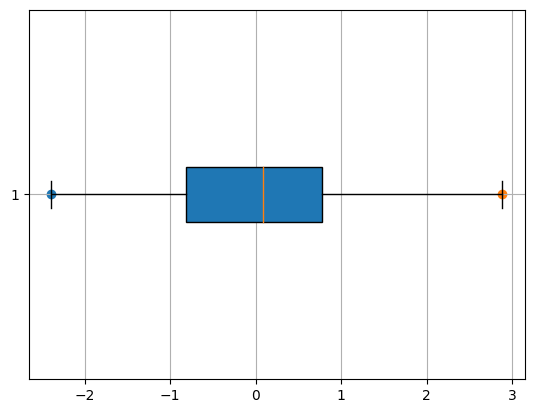

In [37]:
e_arr = np.sort(e[:, 0]) # те это теперь не столбец, а отсорт массив чисел

med = np.median(e_arr)
print("med = ", med)

emin = e_arr[0]
emax = e_arr[-1]
print("e_min = ", emin, ", e_max = ", emax )

if (n % 2 == 0):
    q1 = np.median(e_arr[0 : n//2])
    q2 = np.median(e_arr[n//2 : n])
else:
    q1 = np.median(e_arr[0 : n//2])
    q2 = np.median(e_arr[n//2 + 1 : n])
print("q1 = ", q1, ", q2 = ", q2 )

epsilon_from_quartiles = q2 - q1
print("epsilon = ", epsilon_from_quartiles)

#boxplot
bp = plt.boxplot(x = e_arr, whis = epsilon_from_quartiles * 1.5, vert = False, patch_artist = True) 

#e_max и e_min
plt.scatter(emin, 1)
plt.scatter(emax, 1)
plt.grid()
print(1.5*epsilon_from_quartiles)
print(emax > q2 + 1.5* epsilon_from_quartiles)
print(emin < q1 - 1.5* epsilon_from_quartiles)



#### Получается, выбросов нет #
#### Но попробуем убрать минимальный и максимальный элемент и посмотрим, что будет с объяснятельной способностью #

In [38]:
# убирали мин и макс элементы по выборке
e_new = np.delete(e, [indice_min_e], axis = 0)
e_new = np.delete(e_new, [indice_max_e], axis = 0)

Y_new = np.delete(Y, [indice_min_e], axis = 0)
Y_new = np.delete(Y_new, [indice_max_e], axis = 0)

RSS_new = np.dot(e_new.T, e_new)

y_mean_new = np.mean(Y_new)
TSS_new = np.sum((Y_new - y_mean_new)**2)

R_2_new = (TSS_new - RSS_new) / TSS_new
print("R_2_new = ", R_2_new[0,0])
print("R_2 = ", R_2[0,0])
 
if (R_2_new[0,0] > R_2[0,0]):
    print("Короткая регрессия объясняет лучше")
if (R_2_new[0,0] < R_2[0,0]):
    print("Длинная регрессия объясняет лучше")
if (R_2_new[0,0] == R_2[0,0]):
    print("Регрессии объясняют примерно одинаково")

R_2_new =  0.8283311262475628
R_2 =  0.7886398603933078
Короткая регрессия объясняет лучше


## h) Провести кросс-проверку регрессии 

#### Для этого (x0i, x1i, x2i, x3i, x4i, x5i, yi) выбрасиваем из выборки; # 
#### По остальным n-1 элементам находим коэфициенты лин регрессии, считаем yi с x0i, x1i, x2i, x3i, x4i, x5i и сравниваем с Y[i] #

In [39]:
CVSS = 0
for i in range(n):
    Psi_tran_yi = np.delete(Psi_tran, [i], axis=1)
    Y_yi = np.delete(Y, [i], axis = 0)

    F_yi = np.dot(Psi_tran_yi, Psi_tran_yi.T)
    F_rever_yi = np.linalg.inv(F_yi)

    betta_sample_yi = np.dot(np.dot(F_rever_yi, Psi_tran_yi), Y_yi)
    
    yi = np.dot(Psi_tran.T[i], betta_sample_yi)
    CVSS_i = (yi - Y[i])**2
    CVSS += CVSS_i
    
print("CVSS = ", *CVSS)

R_cv2 = (TSS - CVSS) / TSS
print("R_cv2 = ", *R_cv2)

CVSS =  82.89766400767132
R_cv2 =  0.7248458186881603


#### Получается, регрессия предсказывает на более 50% #

## i) Проверить адекватность регрессии, сделав 5 повторных измерений в одной точке 

In [40]:
i = n//3
print("Рассматриваемая точка: " , i)

l = 5

sigma = 1.5
M = 2 + 3 * x_n[i][0] - 2 * x_n[i][1] + x_n[i][2] + x_n[i][3] - x_n[i][4]

y_add_measure = np.array([])
for j in range(l):
    yi = sps.norm(loc = M, scale = sigma).rvs(size = 1)
    y_add_measure = np.append(y_add_measure, *yi)
    
yi_mean = np.mean(y_add_measure)
s_2 = 0
for j in range(l):
    s_2 += 1/(l-1) * (y_add_measure[j] - yi_mean)**2
    
print("y_add_measure : ", y_add_measure)
print("s_2 = ", s_2)

Рассматриваемая точка:  16
y_add_measure :  [0.72921034 1.67102199 1.63827168 0.81547542 2.09608487]
s_2 =  0.35147237424589933


#### Проверим следующее: #
H0: sigma1^2 = sigma2^2 \
H1: sigma2^2 > sigma1^2 \

delta = RSS / [(n-p) * s^2] ~ F(n-p, l-1)

p-value = 1 - F(~delta)

In [41]:
delta_sample = RSS / ((n - p) * s_2)
print("delta_sample = ", delta_sample[0, 0])

p_value = 1 - sps.f.cdf(delta_sample, (n - p), (l - 1))
print("p_value = ", p_value[0, 0])

if p_value > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что регрессия адекватная ")
else:
    print("Отвергаем H0 => Регрессия неадекватна")

delta_sample =  4.1176117193945565
p_value =  0.08755072019085841
Нет оснований отвергнуть H0 => Считаем, что регрессия адекватная 


## j) Удалить переменную, соотв-ую наименее значимому коэф-у и повторить пункты b, c. Сравнить линейные регрессии. 

#### Для рассмотрим упрощение модели #
H0: betta_del = 0
H1: betta_del != 0

Для длинной и короткой регрессии: \
delta = (RSS0 - RSS1) / RSS1 * (n - p1) / (p1 - p0) ~ F( p1 - p0; n - p1)

In [42]:
Psi_del = np.delete(Psi_tran.T, betta_unimportant_index, axis= 1)
p0 = p - 1

F_del = np.dot(Psi_del.T, Psi_del)
F_rever_del = np.linalg.inv(F_del)

betta_sample_del = np.dot(np.dot(F_rever_del, Psi_del.T), Y)
print(betta_sample_del)

RSS0 = np.dot( (Y - np.dot(Psi_del, betta_sample_del )).T, (Y - np.dot(Psi_del, betta_sample_del )))
print("RSS0 = ", RSS0[0, 0], "RSS = ", RSS[0, 0])

delta_sample = (RSS0 - RSS) / RSS * (n - p) / (p - p0)
print("delta_sample = ", delta_sample[0, 0])

p_value = 1 - sps.f.cdf(delta_sample, (p - p0), (n - p))
print("p_value = ", p_value[0, 0])

if p_value > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что разница RSS0 и RSS не существенна, поэтому можно отбросить этот коэф")
else:
    print("Отвергаем H0 => Отбросить коэффициент нельзя")


[[ 2.09532204]
 [ 3.13777852]
 [-1.85157193]
 [ 1.12258998]
 [-0.99608529]]
RSS0 =  72.4097707291602 RSS =  63.67797775848717
delta_sample =  6.033465638101337
p_value =  0.018053874990510255
Отвергаем H0 => Отбросить коэффициент нельзя


Рассмотрим коэффициент детермиции и проверим значимость

In [43]:
#Коэффициент детерминации
R_2_del = (TSS - RSS0) / TSS
print("R_2_del = ", R_2_del[0,0]," R_2 = ", R_2[0,0]  )

delta_sample_del = R_2_del / (1 - R_2_del) * (n - p0) / (p0 - 1)
print("delta_sample = ", delta_sample_del[0, 0])

p_value_del = 1 - sps.f.cdf(delta_sample_del, (p0 - 1), (n - p0))
print("p_value = ", p_value_del[0, 0])

if p_value_del > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что короткая регрессия не значима")
else:
    print("Отвергаем H0 => Короткая регрессия значима")

R_2_del =  0.7596572663119152  R_2 =  0.7886398603933078
delta_sample =  35.558155284611914
p_value =  2.1194157540094238e-13
Отвергаем H0 => Короткая регрессия значима


## k) Сравнить уравнения регрессии бутстрапом 

#### Смотрим следующее #
H0: R_2 = R1_2 \
H1: R_2 != R1_2

In [44]:
arr_tran_main = Psi_tran.copy()
Psi_size = Psi_tran[:,0].size
arr_tran_main = np.append(arr_tran_main, Y)
arr_tran_main = np.resize(arr_tran_main, (Psi_size + 1, n))
my_delta = R_2 - R_2_del
print(my_delta)

#будет возвращать индексы векторов из arr_tran_boot
def get_bootstrap(x, n_sample):
    x_index = np.arange(0, x[0].size)
    sample = np.random.choice(x_index, size = (x_index.size, n_sample), replace = True)
    return sample

N = 1000
arr_sample_index = get_bootstrap(arr_tran_main, N)
delta_boot = np.array([])

for i in range(N):
    #собираем массив из полученных индексов
    arr_boot_i = np.array([arr_tran_main[:,j] for j in arr_sample_index[:,i]])
    Psi_boot_i = arr_boot_i[:,:Psi_size].copy()
    Y_boot_i = arr_boot_i[:, -1:].copy()
    
    F_boot_i = np.dot(Psi_boot_i.T, Psi_boot_i)
    F_rever_boot_i = np.linalg.inv(F_boot_i)

    betta_sample_boot_i = np.dot(np.dot(F_rever_boot_i, Psi_boot_i.T), Y_boot_i)
    
    RSS_boot_i = np.dot( (Y_boot_i - np.dot(Psi_boot_i, betta_sample_boot_i )).T, (Y_boot_i - np.dot(Psi_boot_i, betta_sample_boot_i )))
    
    y_mean_boot_i = np.mean(Y_boot_i)
    TSS_boot_i = np.sum((Y_boot_i - y_mean_boot_i)**2)
    
    R_2_boot_i = (TSS_boot_i - RSS_boot_i) / TSS_boot_i
    
    
    #упрощаем модель

    Psi_del_boot_i = np.delete(Psi_boot_i, betta_unimportant_index, axis= 1)

    F_del_boot_i = np.dot(Psi_del_boot_i.T, Psi_del_boot_i)
    F_rever_del_boot_i = np.linalg.inv(F_del_boot_i)
    
    betta_sample_del_boot_i = np.dot(np.dot(F_rever_del_boot_i, Psi_del_boot_i.T), Y_boot_i)
    
    RSS0_boot_i = np.dot( (Y_boot_i - np.dot(Psi_del_boot_i, betta_sample_del_boot_i )).T, (Y_boot_i - np.dot(Psi_del_boot_i, betta_sample_del_boot_i )))
    
    R_2_del_boot_i = (TSS_boot_i - RSS0_boot_i) / TSS_boot_i

    delta_boot = np.append(delta_boot, R_2_boot_i - R_2_del_boot_i)
    
delta_boot = np.sort(delta_boot) # вариационный ряд

l = len([delta for delta in delta_boot if delta >= my_delta])
print("l = ", l)
p_value = l / N
print("p_value = ", p_value)

if p_value > alpha:
    print("Нет оснований отвергнуть H0 => Считаем, что усложнение модели не может быть оправдано")
else:
    print("Отвергаем H0 => Усложнение оправдано")

[[0.02898259]]
l =  475
p_value =  0.475
Нет оснований отвергнуть H0 => Считаем, что усложнение модели не может быть оправдано
